# Práctica 7 - Clustering

In [44]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.preprocessing import MinMaxScaler    # Herramientas de polinomios

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from formulaic import model_matrix
from formulaic import Formula

# Paquetes para clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import statistics
from statistics import mode

## Ejercicio 1

In [2]:
datos = np.array([[-1,2],[0,1],[1,2],[8/5,2],[2,1],[3,2],[4,1]])
print(datos)
centros = np.array([[1,2],[3,2]])
print(centros)

[[-1.   2. ]
 [ 0.   1. ]
 [ 1.   2. ]
 [ 1.6  2. ]
 [ 2.   1. ]
 [ 3.   2. ]
 [ 4.   1. ]]
[[1 2]
 [3 2]]


In [3]:
def distancias_a_centros(datos, centros):
    k = len(centros)
    nDatos = len(datos)
    distMatrix = np.zeros((nDatos, k))
    for i, centro in enumerate(centros):
        dist = np.linalg.norm(datos - centro, axis = 1)
        distMatrix[:,i] = dist
    return(distMatrix)
    
def calcular_etiquetas(datos, centros):
    distMatrix = distancias_a_centros(datos, centros)
    etiquetas = np.argmin(distMatrix, axis = 1)   # Array de enteros
    return(pd.Series(etiquetas.astype("str")))

In [4]:
distancias_a_centros(datos,centros)

array([[2.        , 4.        ],
       [1.41421356, 3.16227766],
       [0.        , 2.        ],
       [0.6       , 1.4       ],
       [1.41421356, 1.41421356],
       [2.        , 0.        ],
       [3.16227766, 1.41421356]])

In [5]:
calcular_etiquetas(datos,centros)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
dtype: object

In [6]:
centros2 = np.array([[0,1],[3,2]])
calcular_etiquetas(datos,centros2)

0    0
1    0
2    0
3    1
4    1
5    1
6    1
dtype: object

La verdad que no se ni como interpretar estos datos. No creo que esté bien. No presté atención a esta clase por el parcial de Análisis Avanzado

## Ejercicio 2

In [7]:
data1 = pd.read_csv("../../datos/p7-data1.csv")
data2 = pd.read_csv("../../datos/p7-data2.csv")

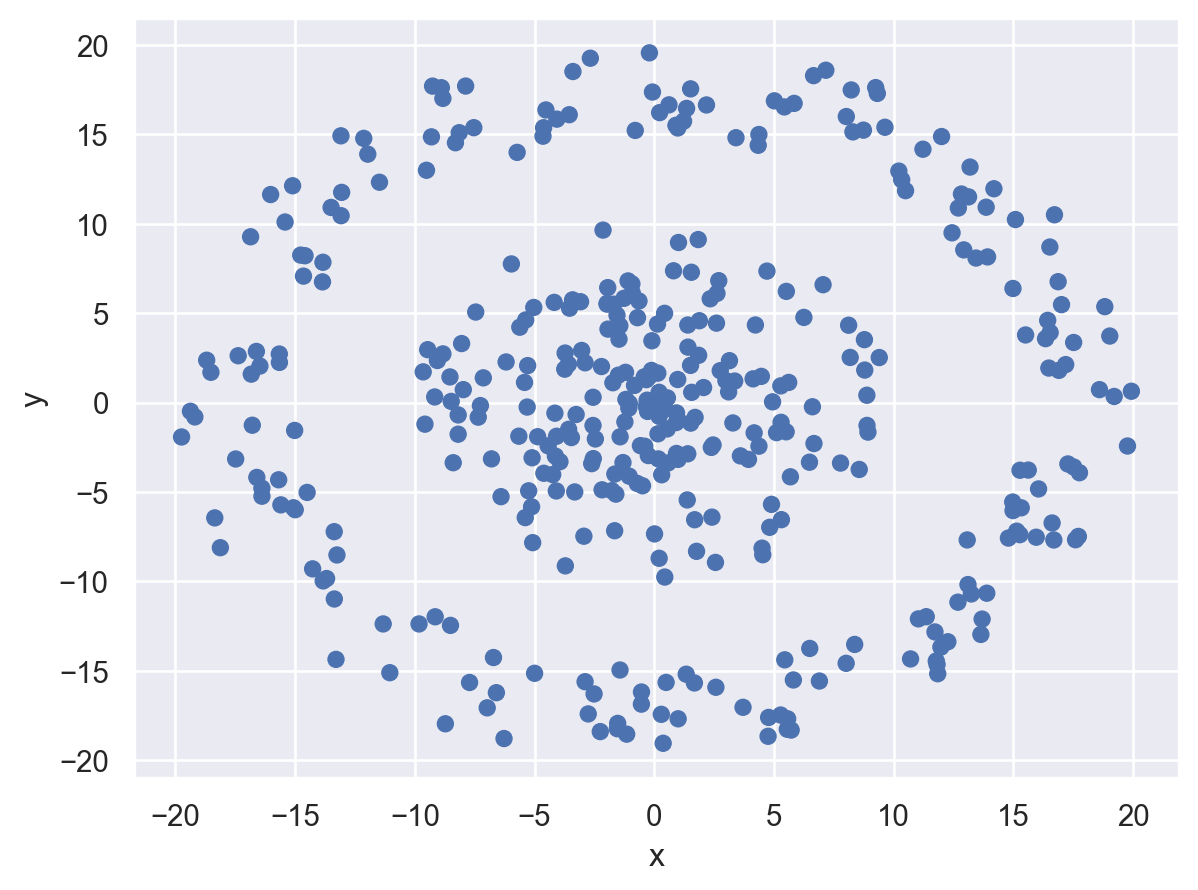

In [8]:
so.Plot(data=data1,x='x',y='y').add(so.Dot())

Podemos identificar dos clusters, pero ya sospecho que K-Means no va a funcionar muy bien en el Dataset `data1`

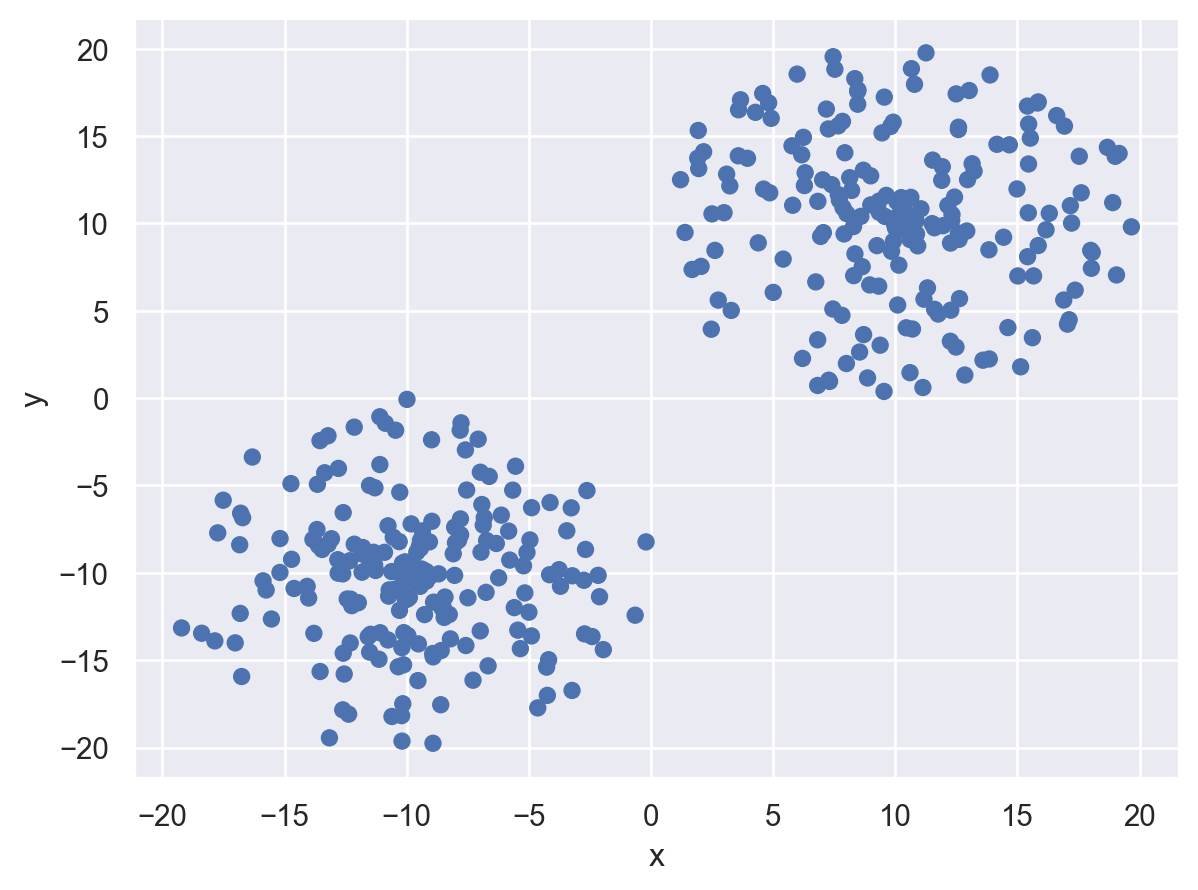

In [9]:
so.Plot(data=data2,x='x',y='y').add(so.Dot())

En `data2` si tiene pinta de que va a funcionar K-Means

In [10]:
kmeans = KMeans(n_clusters=2)

etiquetas1 = kmeans.fit_predict(data1[['x','y']])
etiquetas2 = kmeans.fit_predict(data2[['x','y']])

D:\Program Files\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Program Files\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


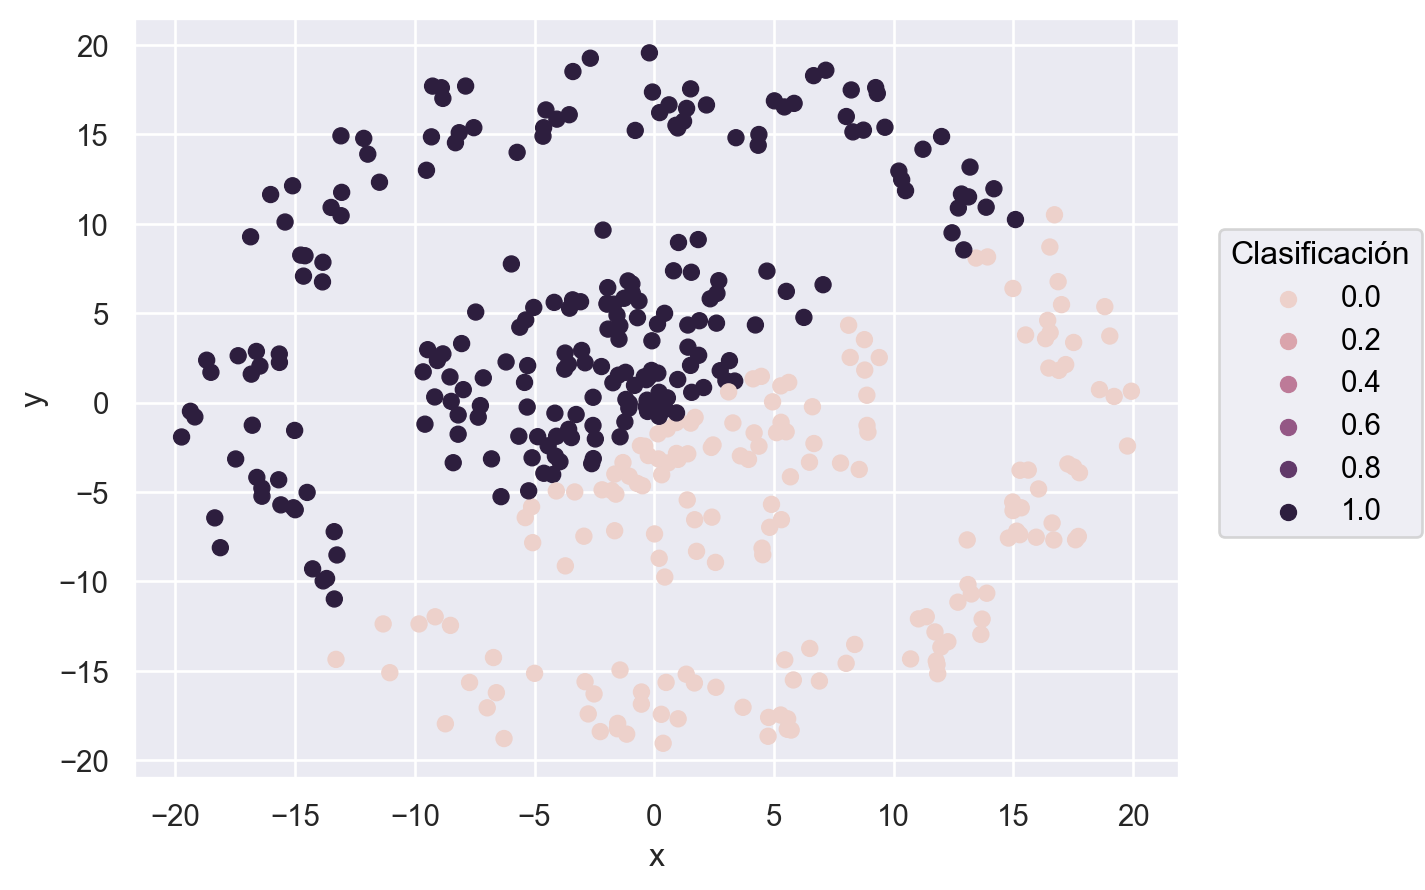

In [11]:
so.Plot(data=data1,x='x',y='y').add(so.Dot(),color=etiquetas1).label(color="Clasificación")

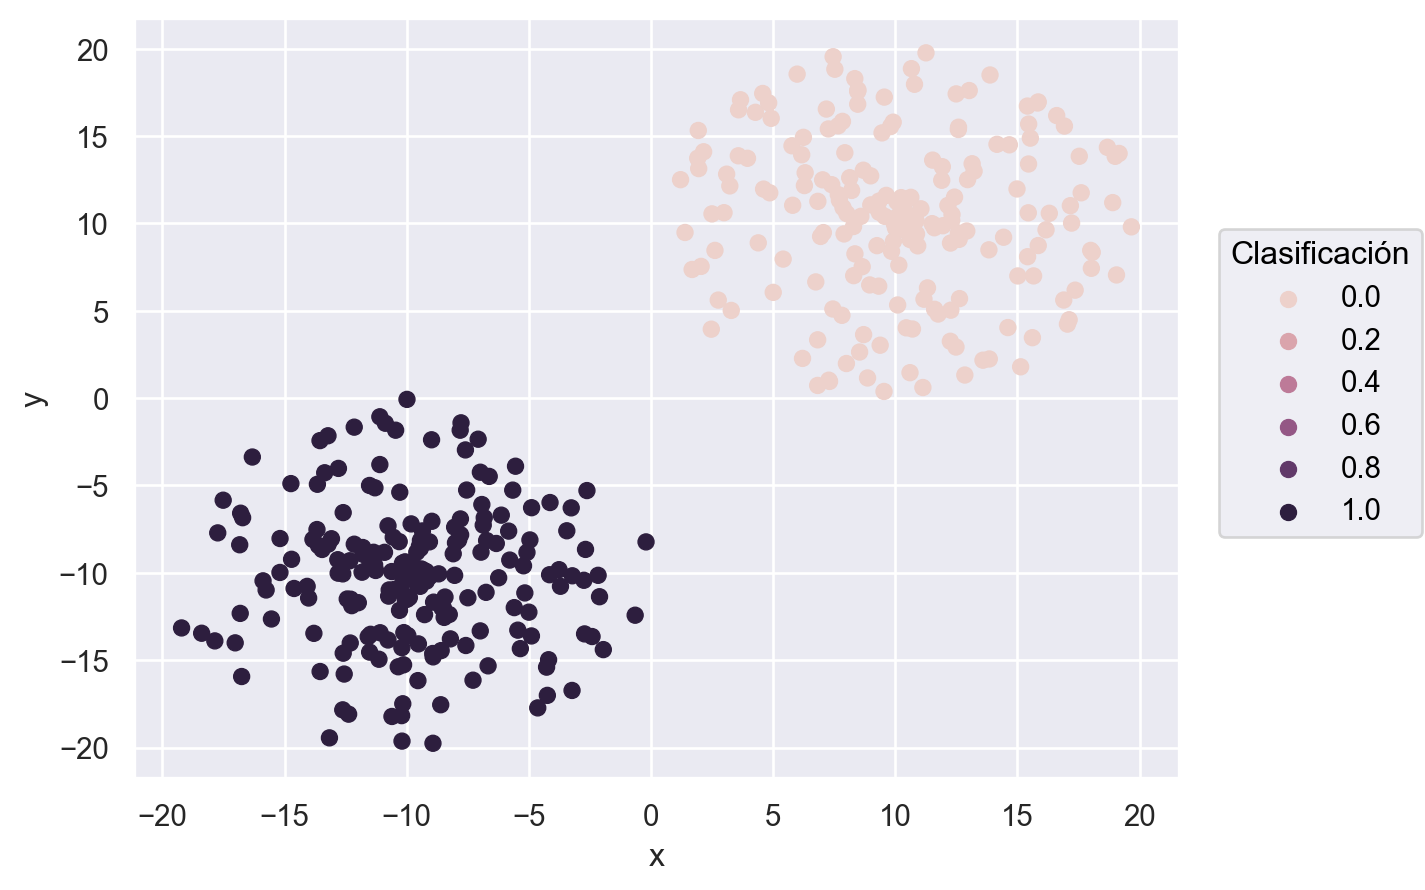

In [12]:
so.Plot(data=data2,x='x',y='y').add(so.Dot(),color=etiquetas2).label(color="Clasificación")

Efectivamente, pasó lo que esperaba.

## Ejercicio 3

In [13]:
iris = pd.read_csv('../../datos/p7-iris.txt',sep='	')
iris.head()

LongSepalo  AnchoSepalo  LongPetalo  AnchoPetalo
0         5.1          3.5         1.4          0.2
1         4.9          3.0         1.4          0.2
2         4.7          3.2         1.3          0.2
3         4.6          3.1         1.5          0.2
4         5.0          3.6         1.4          0.2

Graficamos longitud vs ancho de petalo

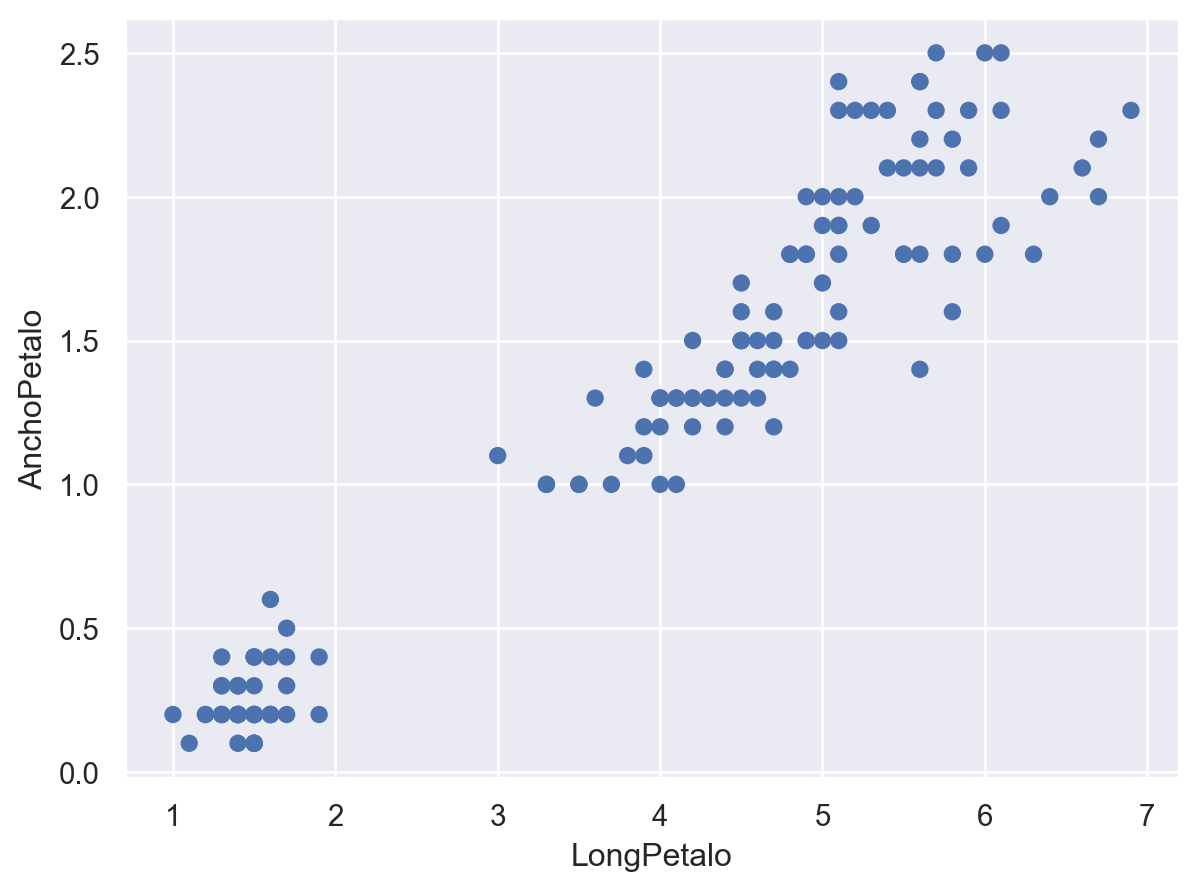

In [14]:
so.Plot(data=iris,x='LongPetalo',y='AnchoPetalo').add(so.Dot())

In [15]:
kmeans3 = KMeans(n_clusters=3)
etiquetas = kmeans3.fit_predict(iris)

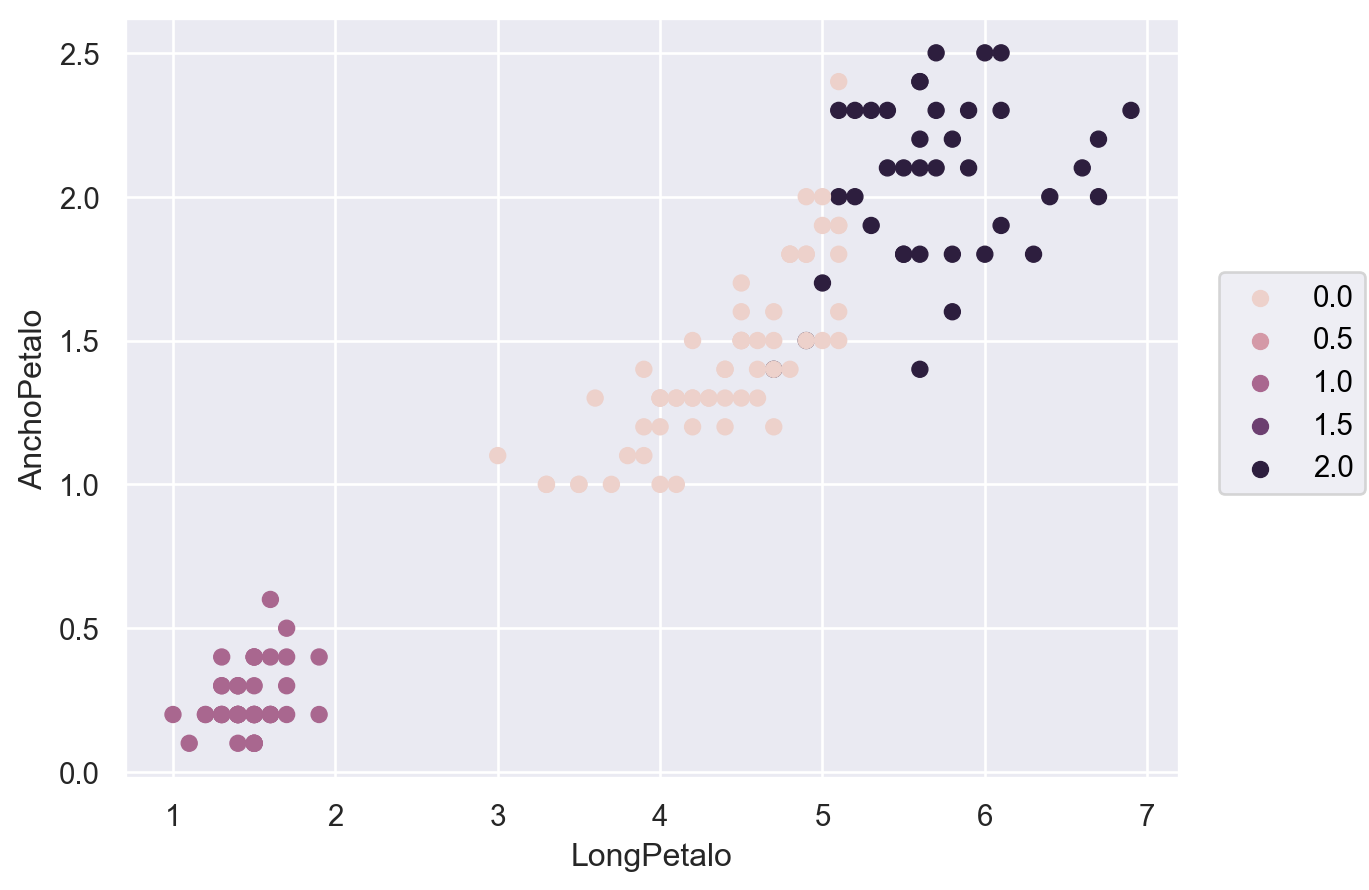

In [16]:
so.Plot(data=iris,x='LongPetalo',y='AnchoPetalo').add(so.Dot(),color=etiquetas)

Evaluamos el WCSS dependiendo de la cantidad de clusters, para ver donde se encuentra el codo

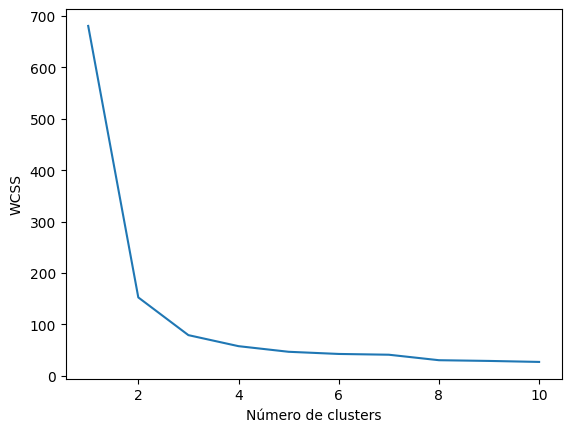

In [17]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit_predict(iris)
    wcss.append(kmeans.inertia_)
    
# Graficamos los resultados en un gráfico, y observamos en qué valor de k se da el "codo"
plt.plot(range(1, 11), wcss)

plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares (suma de cuadrados en cada cluster)
plt.show()

Parece, efectivamente, que el codo está en 3 o 4 clusters

## Ejercicio 4

Consideramos el dataset de datos artificiales `p7-dataSinEscalar.csv`

In [18]:
df = pd.read_csv('../../datos/p7-dataSinEscalar.csv')
df.head

<bound method NDFrame.head of             x            y
0    0.002501  6488.267030
1   -0.026980  2521.947220
2   -0.029001  3068.772910
3    0.007030  4314.274820
4   -0.025356  2384.499450
..        ...          ...
395  0.002410  4810.405110
396  0.003557  4712.744040
397  0.012008   601.671730
398  0.000908  2873.527460
399  0.020784   -96.365402

[400 rows x 2 columns]>

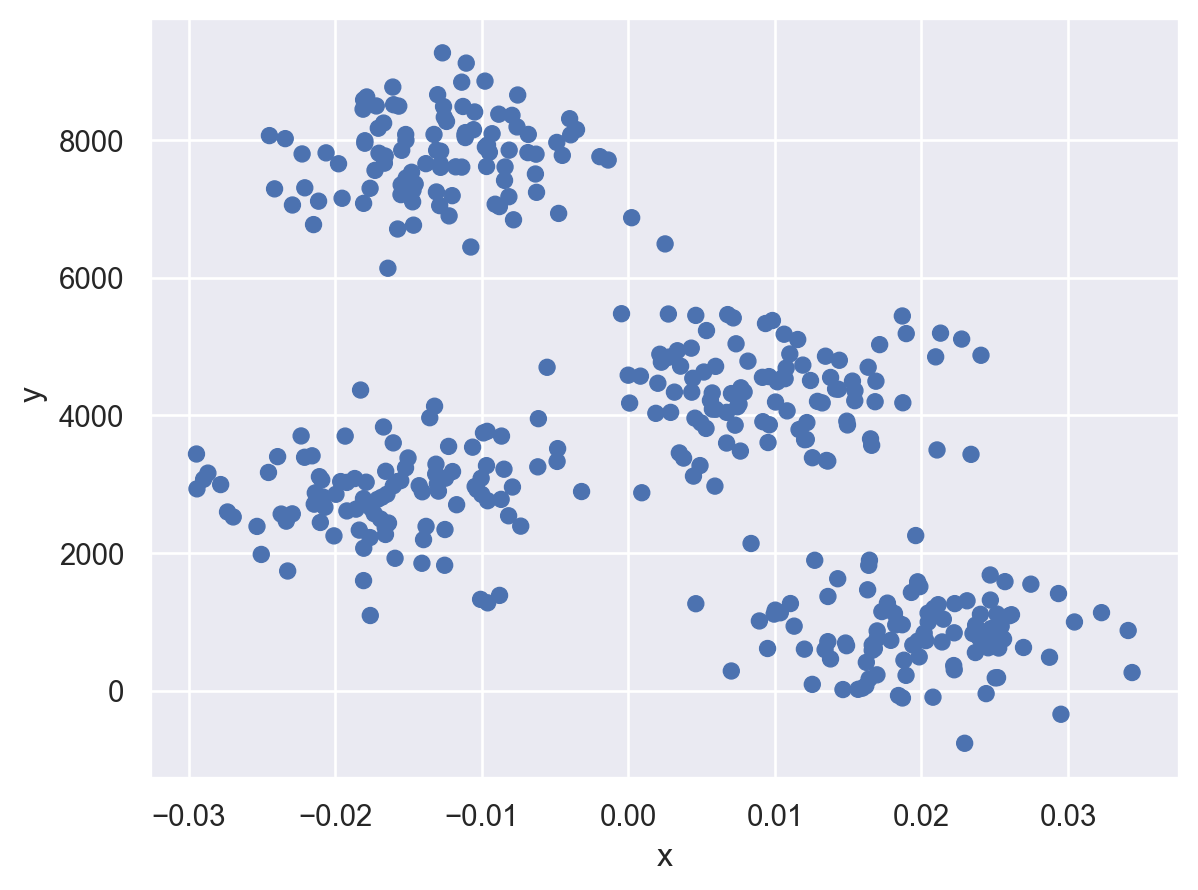

In [19]:
so.Plot(data=df,x='x',y=' y').add(so.Dot())

Podemos identificar en el gráfico 4 clusters, pero que no tienen una forma muy esferica/isotrópica, me imagino que eso nos puede llegar a complicar la vida. Chequeémoslo

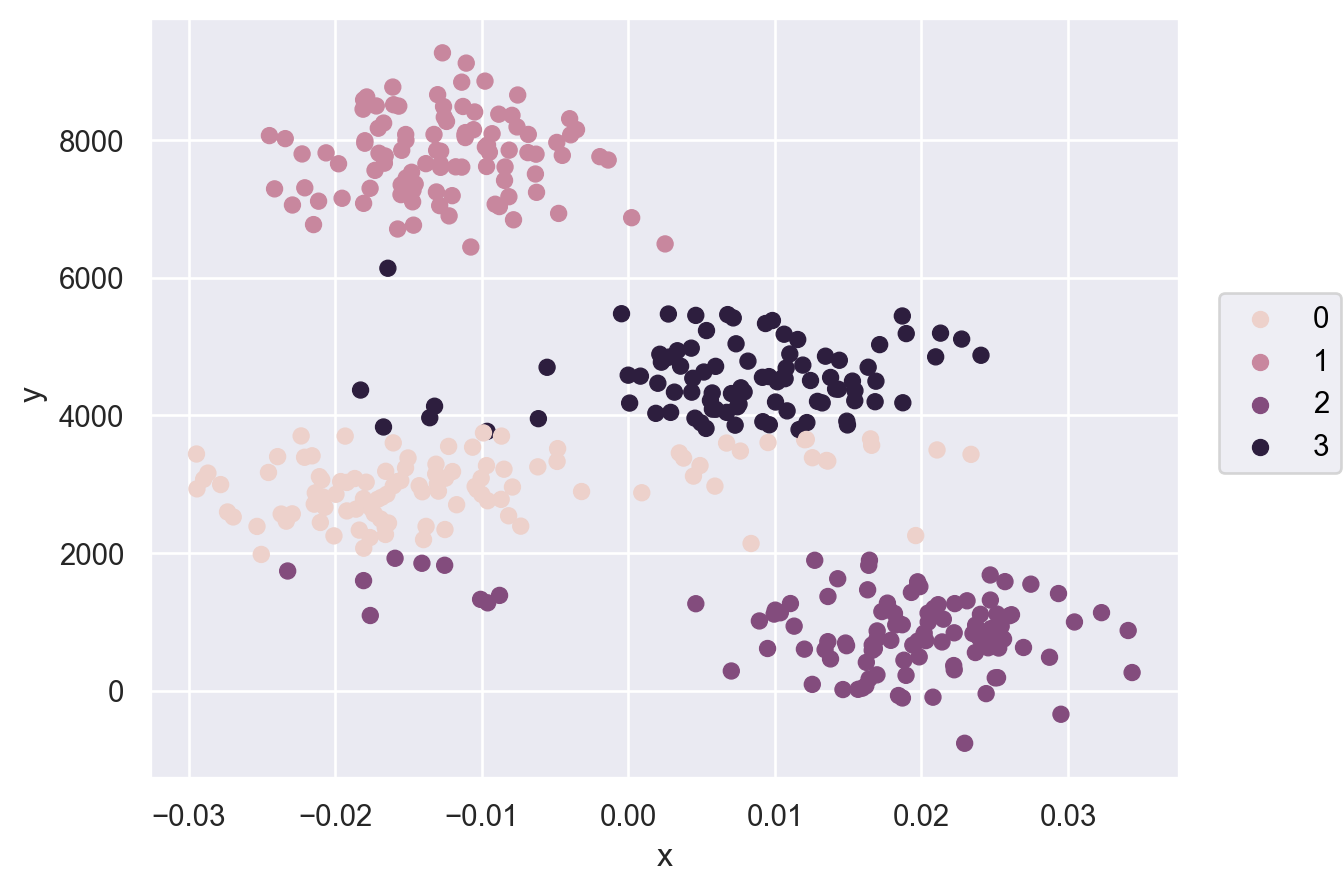

In [20]:
kmeans4 = KMeans(n_clusters=4)
etiquetas_df = kmeans4.fit_predict(df[['x',' y']])
so.Plot(data=df,x='x',y=' y').add(so.Dot(),color=etiquetas_df)

Efectivamente, hay algnos datos que no caen en el cluster que querríamos que caigan

In [21]:
scaler = MinMaxScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df)

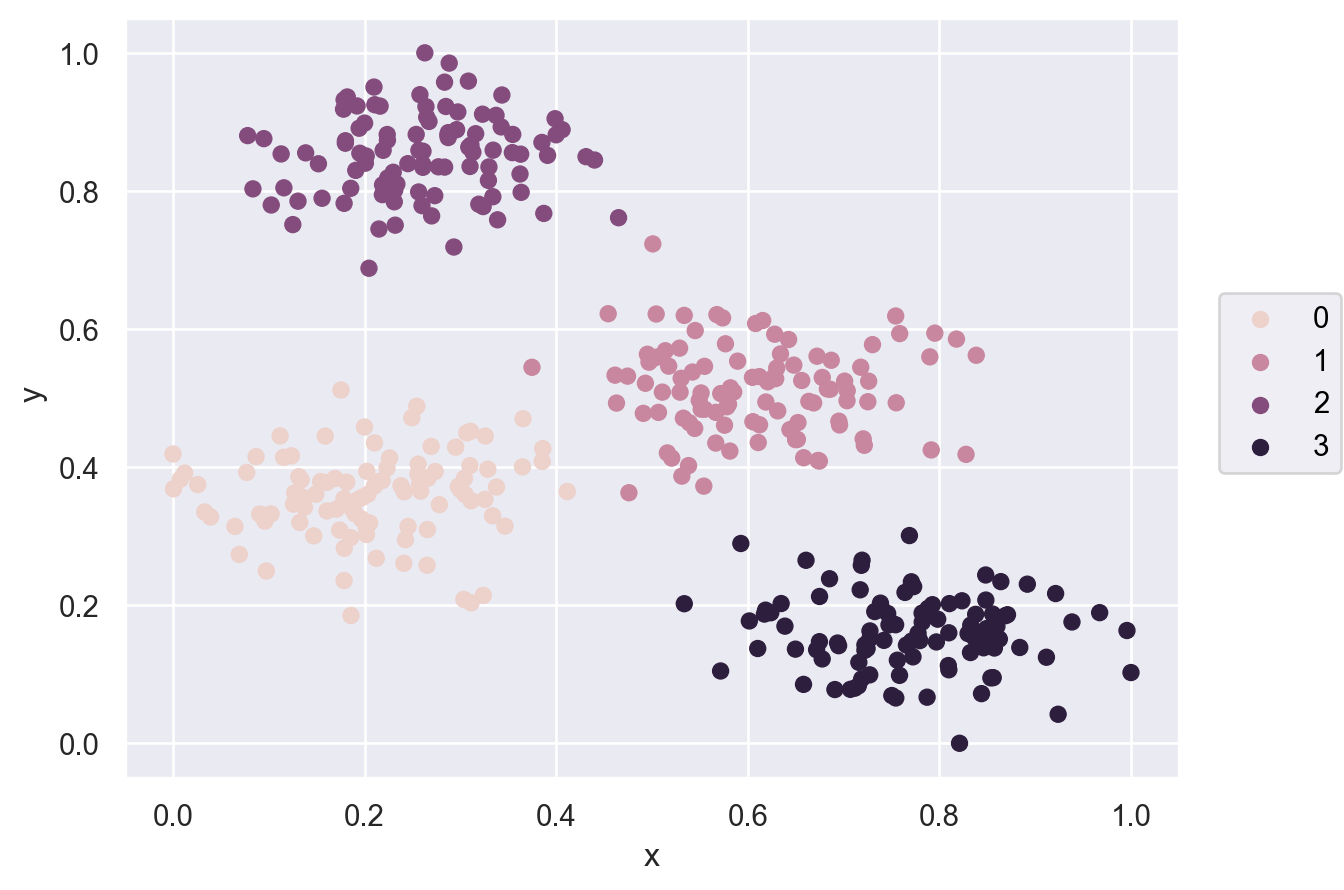

In [22]:
etiquetas_df_scaled = kmeans4.fit_predict(df_scaled[['x',' y']])
so.Plot(data=df_scaled,x='x',y=' y').add(so.Dot(),color=etiquetas_df_scaled)

## Ejercicio 6

Implementar un clasificador de k-NN que prediga el sexo de los pingüinos utilizando como variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares) y evaluar el error de predicción en cada caso. ¿Cómo elegiría el valor de k óptimo?

In [45]:
def mas_votado(datos, categorias, ind, K):
    neighbors = NearestNeighbors(n_neighbors= K)  # Vamos a eliminar al propio pinguino de los datos, por eso tomamos K.
    neighbors.fit(datos.drop([ind]))

    distances, indices = neighbors.kneighbors(datos.iloc[[ind]])
    votos = categorias[indices.flatten()]

    return(mode(votos))

def knn_leave_one_out(datos, categorias, K):
    correctos = 0
    total = len(datos)
    for ind in range(total):
        prediccion = mas_votado(datos, categorias, ind, K)
        if(categorias[ind] == prediccion):
            correctos += 1
    return(correctos / total)

In [46]:
# Llamamos al dataset sin na y reseteando los índices
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

# Le aplicamos MinMax
penguins[["bill_length_mm", "flipper_length_mm"]] = MinMaxScaler().fit_transform(penguins[["bill_length_mm", "flipper_length_mm"]])

# Pedimos visualización
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        0.254545           18.7           0.152542   
1  Adelie  Torgersen        0.269091           17.4           0.237288   
2  Adelie  Torgersen        0.298182           18.0           0.389831   
3  Adelie  Torgersen        0.167273           19.3           0.355932   
4  Adelie  Torgersen        0.261818           20.6           0.305085   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3450.0  Female  
4       3650.0    Male

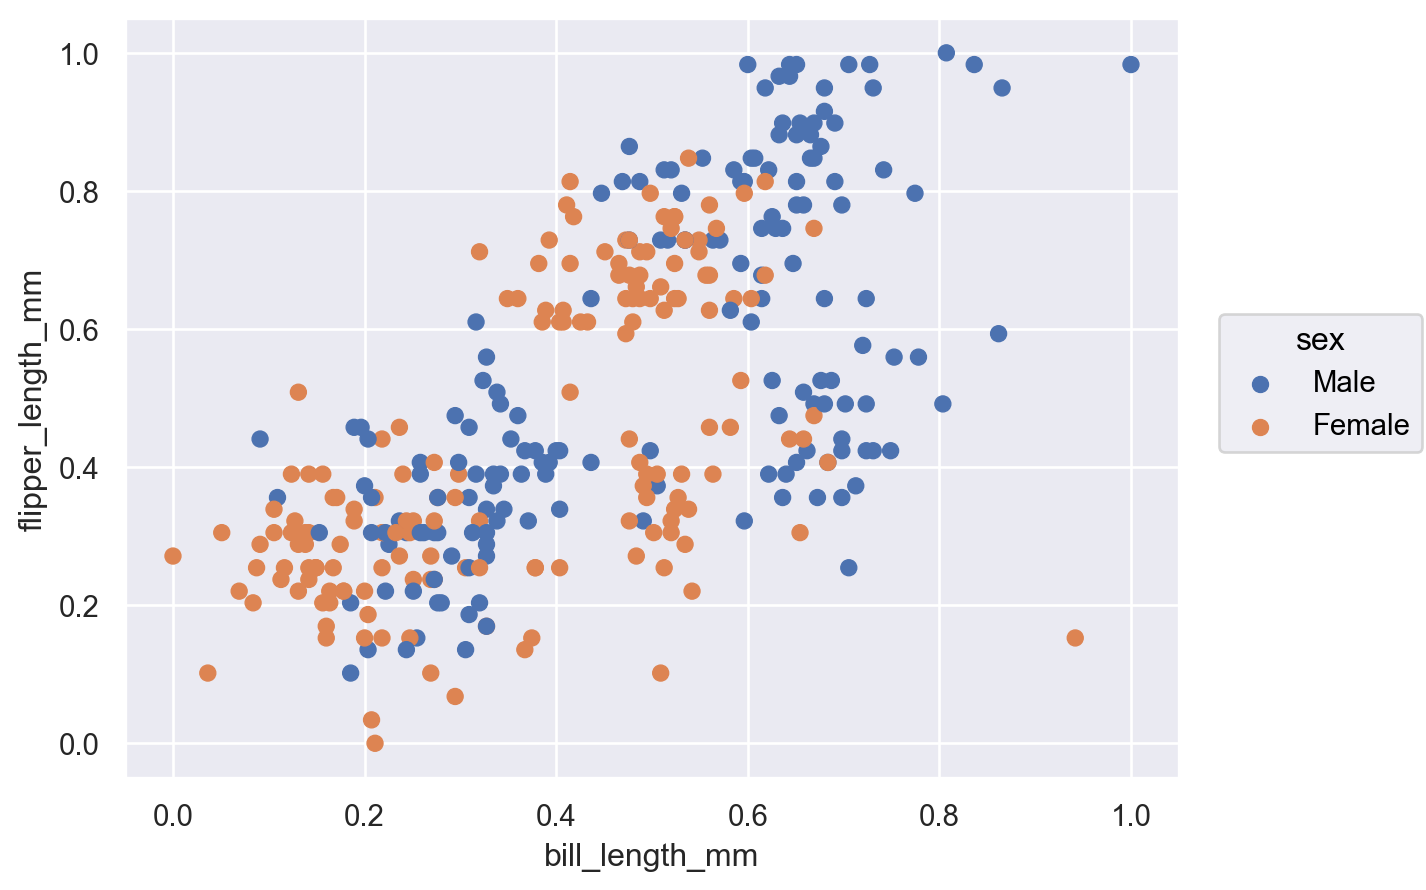

In [47]:
# Graficamos los datos respecto a las dos variables que nos interesan
(
    so.Plot(data=penguins,x="bill_length_mm",y="flipper_length_mm",color="sex")
    .add(so.Dot())
)

In [48]:
# Nos quedamos solo con los datos que nos interesan
datos = penguins[["bill_length_mm", "flipper_length_mm"]]
categorias = penguins['sex']

In [49]:
# Voy fijandome la cantidad de aciertos que tengo con cada k
for K in range(1,30,2):
    aciertos = knn_leave_one_out(datos, categorias, K)
    print(K, aciertos)

1 0.5165165165165165
3 0.5555555555555556
5 0.5135135135135135
7 0.5435435435435435
9 0.5195195195195195
11 0.5285285285285285
13 0.5195195195195195
15 0.5225225225225225
17 0.5135135135135135
19 0.5165165165165165
21 0.5345345345345346
23 0.5315315315315315
25 0.5375375375375375
27 0.5315315315315315
29 0.5345345345345346


En base a esto, nos quedamos con $k=3$

## Ejercicio 7

Implementar un clasificador de k-NN que prediga la especie de los pingüinos. Pueden elegir las variables ¿con cuáles variables obtienen mejores resultados?

Para elegir como clasificar a los pinguinos, usemos $\texttt{pairplot()}$

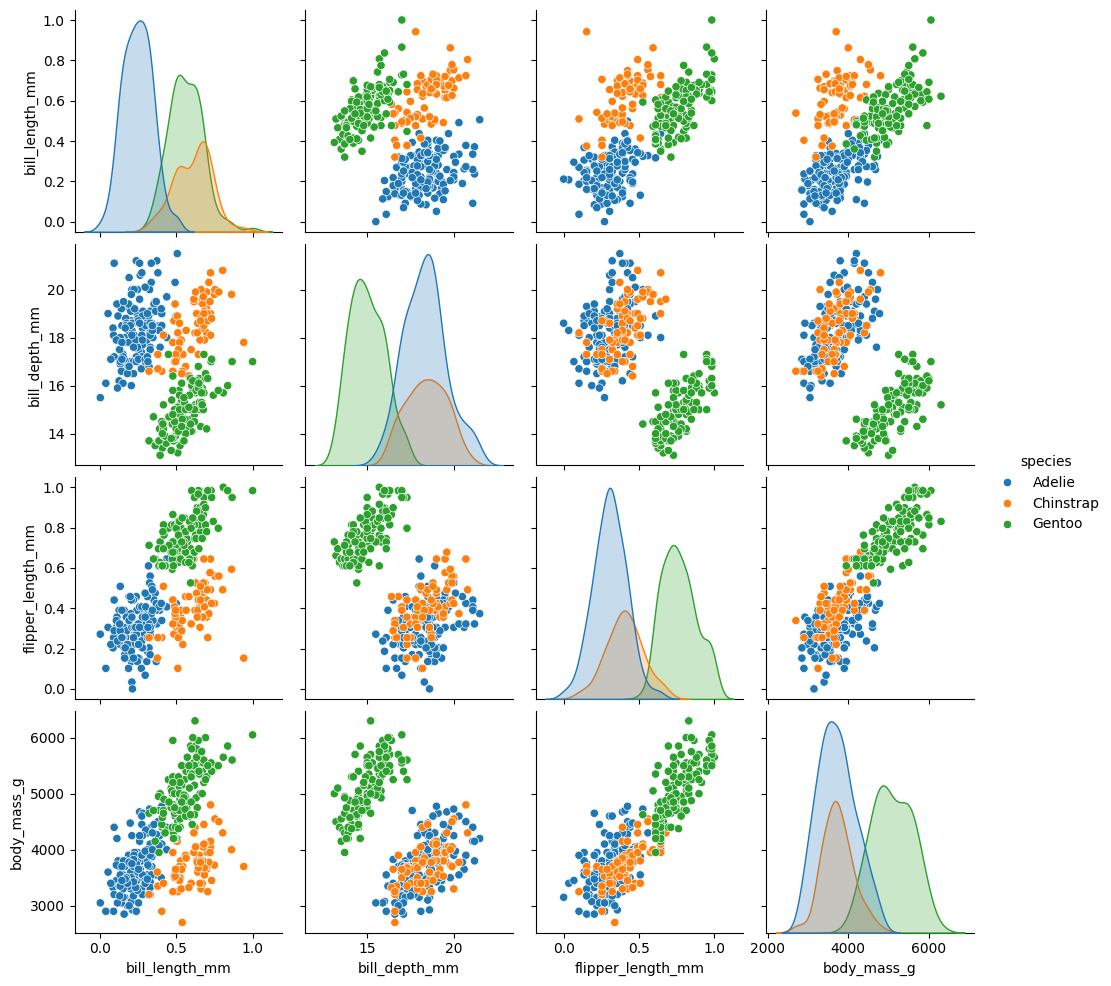

In [32]:
sns.pairplot(data=penguins, hue="species")

Pareciera que las mejores opciones son $\texttt{bill\_length vs bill\_depth}$ y $\texttt{bill\_length vs flipper\_length}$

### bill_length vs bill_depth

In [50]:
# Nos quedamos solo con los datos que nos interesan
datos = penguins[["bill_length_mm", "bill_depth_mm"]]
categorias = penguins['species']

In [51]:
# Voy fijandome la cantidad de aciertos que tengo con cada k
for K in range(1,30,2):
    aciertos = knn_leave_one_out(datos, categorias, K)
    print(K, aciertos)

1 0.5615615615615616
3 0.5375375375375375
5 0.5315315315315315
7 0.5285285285285285
9 0.5675675675675675
11 0.5525525525525525
13 0.5435435435435435
15 0.5525525525525525
17 0.5555555555555556
19 0.5495495495495496
21 0.5495495495495496
23 0.5465465465465466
25 0.5495495495495496
27 0.5615615615615616
29 0.5615615615615616


Elegimos $k=9$

### bill_length vs flipper_length

In [52]:
# Nos quedamos solo con los datos que nos interesan
datos = penguins[["bill_length_mm", "flipper_length_mm"]]
categorias = penguins['species']

In [53]:
# Voy fijandome la cantidad de aciertos que tengo con cada k
for K in range(1,30,2):
    aciertos = knn_leave_one_out(datos, categorias, K)
    print(K, aciertos)

1 0.9429429429429429
3 0.963963963963964
5 0.9669669669669669
7 0.960960960960961
9 0.954954954954955
11 0.954954954954955
13 0.954954954954955
15 0.954954954954955
17 0.948948948948949
19 0.9519519519519519
21 0.9519519519519519
23 0.9519519519519519
25 0.9519519519519519
27 0.9519519519519519
29 0.948948948948949


Nos quedamos con $k=5$

### bill_length vs body_mass

In [56]:
# Nos quedamos solo con los datos que nos interesan
datos = penguins[["bill_length_mm", "body_mass_g"]]
categorias = penguins['species']

In [57]:
# Voy fijandome la cantidad de aciertos que tengo con cada k
for K in range(1,30,2):
    aciertos = knn_leave_one_out(datos, categorias, K)
    print(K, aciertos)

1 0.8468468468468469
3 0.7957957957957958
5 0.7927927927927928
7 0.7777777777777778
9 0.7807807807807807
11 0.7837837837837838
13 0.7807807807807807
15 0.7597597597597597
17 0.7567567567567568
19 0.7567567567567568
21 0.7717717717717718
23 0.7567567567567568
25 0.7387387387387387
27 0.7417417417417418
29 0.7237237237237237


Los mejores resultados se obtienen al usar $\texttt{bill\_length}$ y $\texttt{flipper\_length}$

### Exposición de resultados finales

In [58]:
# Usamos k=5 como habíamos dicho antes
knn = KNeighborsClassifier(n_neighbors=5)

# Nos quedamos solo con los datos que nos interesan
datos = penguins[["bill_length_mm", "flipper_length_mm"]]
categorias = penguins['species']

# Inicializamos el modelo con los datos
knn.fit(X, y)

KNeighborsClassifier()

¿Cómo lo visualizo? Preguntar